### < JTBC의 뉴스 기사를 파싱하여 날짜별로 통계를 구하여 시각화하기 >

In [5]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [7]:
# beautifulsoup4 모듈과 requests 모듈 설치하기

#####################################################################################################

In [22]:
import urllib.request

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

# http://news.jtbc.joins.com/section/index.aspx?scode=70

# 참고
# find_all()는 List형태로 찾은 문자를 리턴한다.

# 참고
# get_text()는 모든 문자열을 하나의 문자열로 합쳐서 되돌려준다.

# 참고
# strip()는 파이썬의 문자열에서 공백을 제거한다.

def main():
    url = "http://news.jtbc.joins.com/section/index.aspx?scode=70"
    sourcecode = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(sourcecode, "html.parser")
    times = []
    
    for i in range(0,20): # 20번 반복한다.
       times.append(soup.find_all("span", class_="date")[i].get_text().strip())
    
    print(times)
    # [ 2020-09-02 21:05', '2020-09-02 08:25', .... ]

    edited = []
    
    # 2020-09-02 21:05 중에서.. 02일만 잘라내서 edited리스트에 추가한다.
    for i in range(0, len(times)):
        edited.append(times[i][8:10]) # 8번째 index부터 9번째 index까지 슬라이싱한다.
    
    print(edited) 
    # ['02', '02', '02', '02', '31', '28', '28', '26', '24', '24', '23', '20', '20', '18', '17', '15', '14', '14', '13', '13']
    
    count1 = 0 # 9/2일 작성된 기사 갯수를 저장할 변수
    count2 = 0 # 8/31일 작성된 기사 갯수를 저장할 변수
    count3 = 0 # 8/28일 작성된 기사 갯수를 저장할 변수
    count4 = 0 # 8/24일 작성된 기사 갯수를 저장할 변수
    
    for i in range(0, len(edited)):
        if edited[i] == "02": # 9/2일에 작성된 기사라면
            count1 = count1 + 1
        elif edited[i] == "31":
            count2 = count2 + 1
        elif edited[i] == "28":
            count3 = count3 + 1
        elif edited[i] == "24":
            count4 = count4 + 1
        
    # 각 범주가 데이터에서 차지하는 비율(일별 기사 갯수)
    days = [count1, count2, count3, count4]
    #        02일,   31일,   28일,   24일
    
    # 범주데이터를 준비한다.
    activities = ['02', '31', '28', '24']
    
    # 차트 색상값을 리스트에 저장하여 준비한다
    colors = ['pink', 'skyblue', 'green', 'yellow']
    
    # 파이차트 그리기
    plt.pie(days, 
            labels = activities,
            colors = colors, 
            startangle = 90, 
            autopct = '%.2f%%')
    
    plt.show()

['2020-09-02 21:05', '2020-09-02 08:25', '2020-09-02 오후 9:05:00', '2020-09-02 오전 8:25:00', '2020-08-31 오후 9:49:00', '2020-08-28 오후 9:06:00', '2020-08-28 오전 9:47:00', '2020-08-26 오후 10:07:00', '2020-08-24 오후 9:36:00', '2020-08-24 오전 9:43:00', '2020-08-23 오후 8:12:00', '2020-08-20 오후 9:40:00', '2020-08-20 오전 9:25:00', '2020-08-18 오후 9:31:00', '2020-08-17 오후 9:38:00', '2020-08-15 오후 7:48:00', '2020-08-14 오후 9:17:00', '2020-08-14 오전 9:42:00', '2020-08-13 오후 9:43:00', '2020-08-13 오후 9:19:00']
['02', '02', '02', '02', '31', '28', '28', '26', '24', '24', '23', '20', '20', '18', '17', '15', '14', '14', '13', '13']


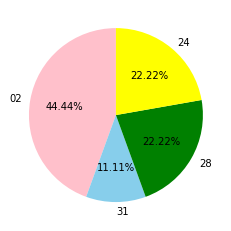

In [23]:
main()